In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('hubble_data.csv')
df

,distance,recession_velocity
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185
5,0.275,-220
6,0.450,200
7,0.500,290
8,0.500,270
9,0.630,200


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
linreg = LinearRegression()

In [5]:
distance = np.array(df.distance)
distance = distance.reshape(-1,1)
distance

array([[0.032],
       [0.034],
       [0.214],
       [0.263],
       [0.275],
       [0.275],
       [0.45 ],
       [0.5  ],
       [0.5  ],
       [0.63 ],
       [0.8  ],
       [0.9  ],
       [0.9  ],
       [0.9  ],
       [0.9  ],
       [1.   ],
       [1.1  ],
       [1.1  ],
       [1.4  ],
       [1.7  ],
       [2.   ],
       [2.   ],
       [2.   ],
       [2.   ]])

In [6]:
velocity = np.array(df.recession_velocity)
velocity = velocity.reshape(-1,1)
velocity

array([[ 170],
       [ 290],
       [-130],
       [ -70],
       [-185],
       [-220],
       [ 200],
       [ 290],
       [ 270],
       [ 200],
       [ 300],
       [ -30],
       [ 650],
       [ 150],
       [ 500],
       [ 920],
       [ 450],
       [ 500],
       [ 500],
       [ 960],
       [ 500],
       [ 850],
       [ 800],
       [1090]], dtype=int64)

In [7]:
linreg.fit(distance, velocity)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
print(linreg.intercept_)
print(linreg.coef_)

[-40.7836491]
[[454.15844092]]


Voici d'abord un nuage de points avec en abscisse la distance entre la galaxie et nous, et en ordonnée la vitesse à laquelle elle s'éloigne de nous.

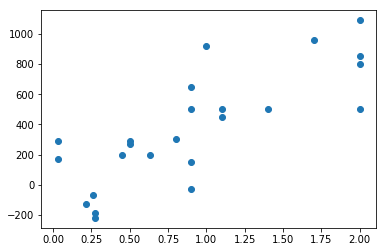

In [9]:
plt.scatter(df.distance.values, df.recession_velocity.values)

Voici le graphique associé à ce nuage de points (sans grand intérêt).

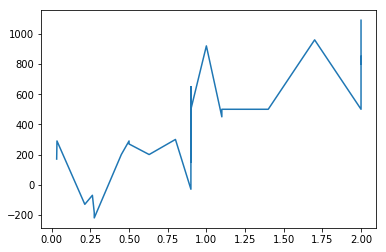

In [10]:
plt.plot(df.distance.values, df.recession_velocity.values)

Utilisons Seaborn pour mettre en évidence la relation entre ces deux variables (distance et vélocité). 

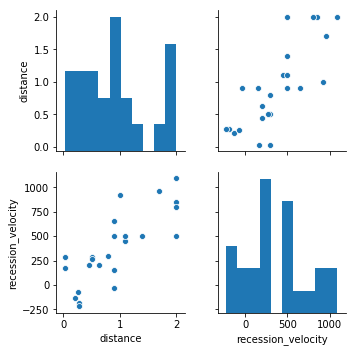

In [11]:
sns.pairplot(df)

C:\Users\etien\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\etien\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


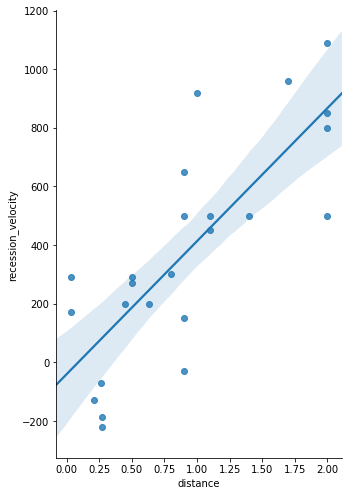

In [12]:
sns.pairplot(df, x_vars='distance', y_vars='recession_velocity',size=7, aspect=0.7, kind='reg')

Une autre façon de tracer le graphique, sans passer par seaborn mais uniquement par matplotlib:

In [14]:
intercept = linreg.intercept_
slope = linreg.coef_

f = lambda x: x*slope + intercept

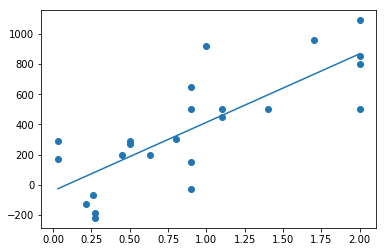

In [15]:
plt.scatter(distance,velocity)
plt.plot(distance, f(distance))